In [1]:
###import modules
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

from xgboost import XGBClassifier, plot_importance

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler 

from sklearn.tree import plot_tree, DecisionTreeClassifier
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix,accuracy_score,recall_score,precision_score,f1_score

In [2]:
# read raw data
co_data = pd.read_csv("co_bankrupcy_data.csv")

In [3]:
co_data.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [4]:
#check number of rows and columns
co_data.shape

(6819, 96)

In [5]:
#check data types and for null values
co_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [6]:
describe = co_data.describe()
describe

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


In [7]:
#export to csv
describe.to_csv('describe.csv')

In [8]:
co_data['Bankrupt?'].unique()

array([1, 0], dtype=int64)

In [9]:
#check for single value columns
for column in co_data.columns:
    print(co_data[column].unique())

[1 0]
[0.37059426 0.46429094 0.42607127 ... 0.47433335 0.54789646 0.49953688]
[0.42438945 0.53821413 0.49901875 ... 0.49329481 0.6067379  0.6480048 ]
[0.40574977 0.51673002 0.47229509 ... 0.63172547 0.52417153 0.52063815]
[0.60145721 0.61023509 0.60145001 ... 0.60445524 0.61044408 0.62740887]
[0.60145721 0.61023509 0.60136352 ... 0.60601191 0.61316825 0.62740887]
[0.9989692  0.99894598 0.99885735 ... 0.998741   0.99917649 0.9980803 ]
[0.79688715 0.79738019 0.79640337 ... 0.79741851 0.79711845 0.80198665]
[0.80880936 0.80930073 0.80838752 ... 0.8090958  0.80960278 0.81379956]
[0.30264643 0.30355643 0.30203518 ... 0.30362    0.30378919 0.31341533]
[0.78098485 0.78150597 0.78028394 ... 0.78133854 0.7815464  0.78607904]
[0.0001257  0.00028979 0.00023613 ... 0.00028423 0.00025093 0.0014317 ]
[0.00000000e+00 2.55000000e+07 7.30000000e+08 ... 8.98000000e+09
 1.65710520e-04 3.68604037e-04]
[0.45814314 0.46186726 0.45852059 ... 0.46373435 0.4761229  0.42772116]
[7.25072507e-04 6.47064706e-04 7.

In [10]:
#drop irrelevant columns
co_data=co_data.drop(co_data.columns[94],axis=1)

In [11]:
co_data.shape

(6819, 95)

In [12]:
co_data.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,0.035490


In [13]:
#create correlation matrix to check multicolinearity
corr = co_data.corr()
corr

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability
Bankrupt?,1.000000,-0.260807,-0.282941,-0.273051,-0.100043,-0.099445,-0.000230,-0.008517,-0.008857,-0.016593,...,0.139212,-0.315457,0.035104,-0.005547,-0.100044,-0.180987,0.166812,0.010508,-0.005509,-0.083048
ROA(C) before interest and depreciation before interest,-0.260807,1.000000,0.940124,0.986849,0.334719,0.332755,0.035725,0.053419,0.049222,0.020501,...,-0.109272,0.887670,-0.071725,0.008135,0.334721,0.274287,-0.143629,-0.016575,0.010573,0.052416
ROA(A) before interest and % after tax,-0.282941,0.940124,1.000000,0.955741,0.326969,0.324956,0.032053,0.053518,0.049474,0.029649,...,-0.156890,0.961552,-0.098900,0.011463,0.326971,0.291744,-0.141039,-0.011515,0.013372,0.057887
ROA(B) before interest and depreciation after tax,-0.273051,0.986849,0.955741,1.000000,0.333749,0.331755,0.035212,0.053726,0.049952,0.022366,...,-0.120680,0.912040,-0.089088,0.007523,0.333750,0.280617,-0.142838,-0.014663,0.011473,0.056430
Operating Gross Margin,-0.100043,0.334719,0.326969,0.333749,1.000000,0.999518,0.005745,0.032493,0.027175,0.051438,...,-0.032930,0.300143,0.022672,0.004205,1.000000,0.075304,-0.085434,-0.011806,-0.001167,0.120029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Net Income to Stockholder's Equity,-0.180987,0.274287,0.291744,0.280617,0.075304,0.074891,0.006216,0.011343,0.010648,0.007693,...,0.192688,0.328492,-0.040217,0.000127,0.075303,1.000000,-0.791836,-0.000093,0.005147,0.029622
Liability to Equity,0.166812,-0.143629,-0.141039,-0.142838,-0.085434,-0.085407,0.001541,-0.004043,-0.004390,-0.011899,...,-0.229559,-0.159697,0.021982,-0.003724,-0.085434,-0.791836,1.000000,0.002119,0.001487,-0.159654
Degree of Financial Leverage (DFL),0.010508,-0.016575,-0.011515,-0.014663,-0.011806,-0.011268,0.000935,0.000855,0.000927,-0.000556,...,-0.001717,-0.010463,-0.001881,-0.008812,-0.011806,-0.000093,0.002119,1.000000,0.016513,-0.016739
Interest Coverage Ratio (Interest expense to EBIT),-0.005509,0.010573,0.013372,0.011473,-0.001167,-0.001158,0.000393,0.000984,0.000957,0.001024,...,-0.000974,0.012746,0.000239,0.001027,-0.001169,0.005147,0.001487,0.016513,1.000000,-0.008339


In [14]:
#export corr matrix to csv to analyse it seperately
corr.to_csv('corr_matrix.csv')

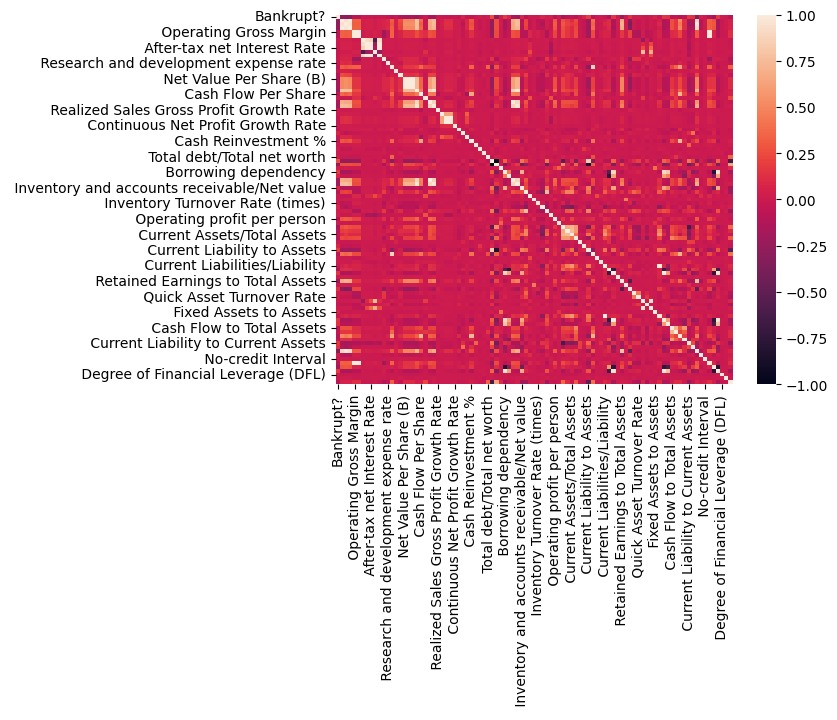

In [15]:
#create heatmap
sns.heatmap(corr)
plt.show()

In [16]:
#drop highly multicollinear columns
mltc_columns = [' ROA(C) before interest and depreciation before interest',' ROA(B) before interest and depreciation after tax',' Realized Sales Gross Margin',' Pre-tax net Interest Rate',' After-tax net Interest Rate',' Continuous interest rate (after tax)',' Net Value Per Share (A)',' Net Value Per Share (C)',' Regular Net Profit Growth Rate',' Net profit before tax/Paid-in capital',' Net Income to Total Assets',' Gross Profit to Sales',' Liability to Equity']

In [17]:
co_data[mltc_columns]

,ROA(C) before interest and depreciation before interest,ROA(B) before interest and depreciation after tax,Realized Sales Gross Margin,Pre-tax net Interest Rate,After-tax net Interest Rate,Continuous interest rate (after tax),Net Value Per Share (A),Net Value Per Share (C),Regular Net Profit Growth Rate,Net profit before tax/Paid-in capital,Net Income to Total Assets,Gross Profit to Sales,Liability to Equity
0,0.370594,0.405750,0.601457,0.796887,0.808809,0.780985,0.147950,0.147950,0.688979,0.137757,0.716845,0.601453,0.290202
1,0.464291,0.516730,0.610235,0.797380,0.809301,0.781506,0.182251,0.182251,0.689702,0.168962,0.795297,0.610237,0.283846
2,0.426071,0.472295,0.601364,0.796403,0.808388,0.780284,0.177911,0.193713,0.689470,0.148036,0.774670,0.601449,0.290189
3,0.399844,0.457733,0.583541,0.796967,0.808966,0.781241,0.154187,0.154187,0.689110,0.147561,0.739555,0.583538,0.281721
4,0.465022,0.522298,0.598783,0.797366,0.809304,0.781550,0.167502,0.167502,0.689697,0.167461,0.795016,0.598782,0.278514
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0.493687,0.543230,0.604462,0.797409,0.809331,0.781588,0.175045,0.175045,0.689778,0.171111,0.799927,0.604455,0.279606
6815,0.475162,0.524172,0.598308,0.797414,0.809327,0.781586,0.181324,0.181324,0.689734,0.171805,0.799748,0.598306,0.278132
6816,0.472725,0.520638,0.610213,0.797401,0.809317,0.781546,0.269521,0.269521,0.689202,0.172287,0.797778,0.610441,0.275789
6817,0.506264,0.554045,0.607850,0.797500,0.809399,0.781663,0.213392,0.213392,0.696113,0.182498,0.811808,0.607846,0.277547


In [18]:
#drop similar and multicollinear columns
co_data=co_data.drop(columns=mltc_columns,axis=1)

In [19]:
co_data.head()

,Bankrupt?,ROA(A) before interest and % after tax,Operating Gross Margin,Operating Profit Rate,Non-industry income and expenditure/revenue,Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),...,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Total assets to GNP price,No-credit Interval,Net Income to Stockholder's Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability
0,1,0.424389,0.601457,0.998969,0.302646,1.256969e-04,0.0,0.458143,0.000725,0.0,...,0.520382,0.312905,0.118250,0,0.009219,0.622879,0.827890,0.026601,0.564050,0.016469
1,1,0.538214,0.610235,0.998946,0.303556,2.897851e-04,0.0,0.461867,0.000647,0.0,...,0.567101,0.314163,0.047775,0,0.008323,0.623652,0.839969,0.264577,0.570175,0.020794
2,1,0.499019,0.601450,0.998857,0.302035,2.361297e-04,25500000.0,0.458521,0.000790,0.0,...,0.538491,0.314515,0.025346,0,0.040003,0.623841,0.836774,0.026555,0.563706,0.016474
3,1,0.451265,0.583541,0.998700,0.303350,1.078888e-04,0.0,0.465705,0.000449,0.0,...,0.604105,0.302382,0.067250,0,0.003252,0.622929,0.834697,0.026697,0.564663,0.023982
4,1,0.538432,0.598783,0.998973,0.303475,7.890000e+09,0.0,0.462746,0.000686,0.0,...,0.578469,0.311567,0.047725,0,0.003878,0.623521,0.839973,0.024752,0.575617,0.035490


In [20]:
#split into train and test data
X=co_data.drop(columns=['Bankrupt?'],axis=1)
Y=co_data['Bankrupt?']

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,train_size = 0.7,stratify=Y,random_state=42)

Hyperparameter Tuning

In [33]:
#define parameters for grid search
param = {'max_depth': [2,5,8,10],
         'min_samples_leaf':[10,20,30]
        }
scoring = ['f1','accuracy']

In [43]:
#instantiate decision tree classifier model
Tree_model=DecisionTreeClassifier(max_depth=8, min_samples_leaf=20,random_state=0)

In [35]:
clf = GridSearchCV(Tree_model,param,scoring=scoring,cv=5,refit='f1')

In [36]:
clf.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [2, 5, 8, 10],
                         'min_samples_leaf': [10, 20, 30]},
             refit='f1', scoring=['f1', 'accuracy'])

In [37]:
clf.best_estimator_

DecisionTreeClassifier(max_depth=8, min_samples_leaf=20, random_state=0)

In [38]:
clf.best_score_

0.3208780855473902

In [44]:
Tree_model=DecisionTreeClassifier(max_depth=8, min_samples_leaf=20,random_state=0)

In [45]:
Tree_model.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=8, min_samples_leaf=20, random_state=0)

In [46]:
prediction=Tree_model.predict(X_test)

In [55]:
#Function to plot a confusion matrix

def confusionMatrix(model,X_test,Y_test):
    model_pred=model.predict(X_test)
    cm=confusion_matrix(Y_test,model_pred, labels=Tree_model.classes_)
    disp=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=Tree_model.classes_)

    disp.plot()
    plt.show()


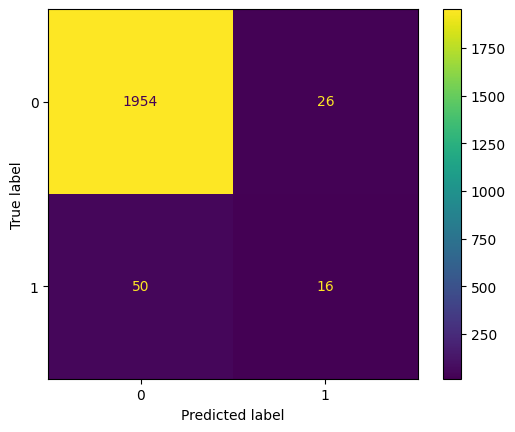

In [56]:
confusionMatrix(Tree_model,X_test,Y_test)

[Text(0.5, 0.875, " Net Income to Stockholder's Equity <= 0.834\ngini = 0.062\nsamples = 4773\nvalue = [4619, 154]\nclass = not bankrupt"),
 Text(0.25, 0.625, ' Debt ratio % <= 0.163\ngini = 0.467\nsamples = 175\nvalue = [110, 65]\nclass = not bankrupt'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, ' Cash Flow to Sales <= 0.672\ngini = 0.282\nsamples = 59\nvalue = [49, 10]\nclass = not bankrupt'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, ' Net Worth Turnover Rate (times) <= 0.093\ngini = 0.499\nsamples = 116\nvalue = [61, 55]\nclass = not bankrupt'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, ' Borrowing dependency <= 0.379\ngini = 0.038\nsamples = 4598\nvalue = [4509, 89]\nclass = not bankrupt'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, ' Total debt/Total net worth <= 0.021\ngini = 0.013\nsamples = 4032\nvalue = [4006, 26]\nclass = not bankrupt'),
 Text(0.5625

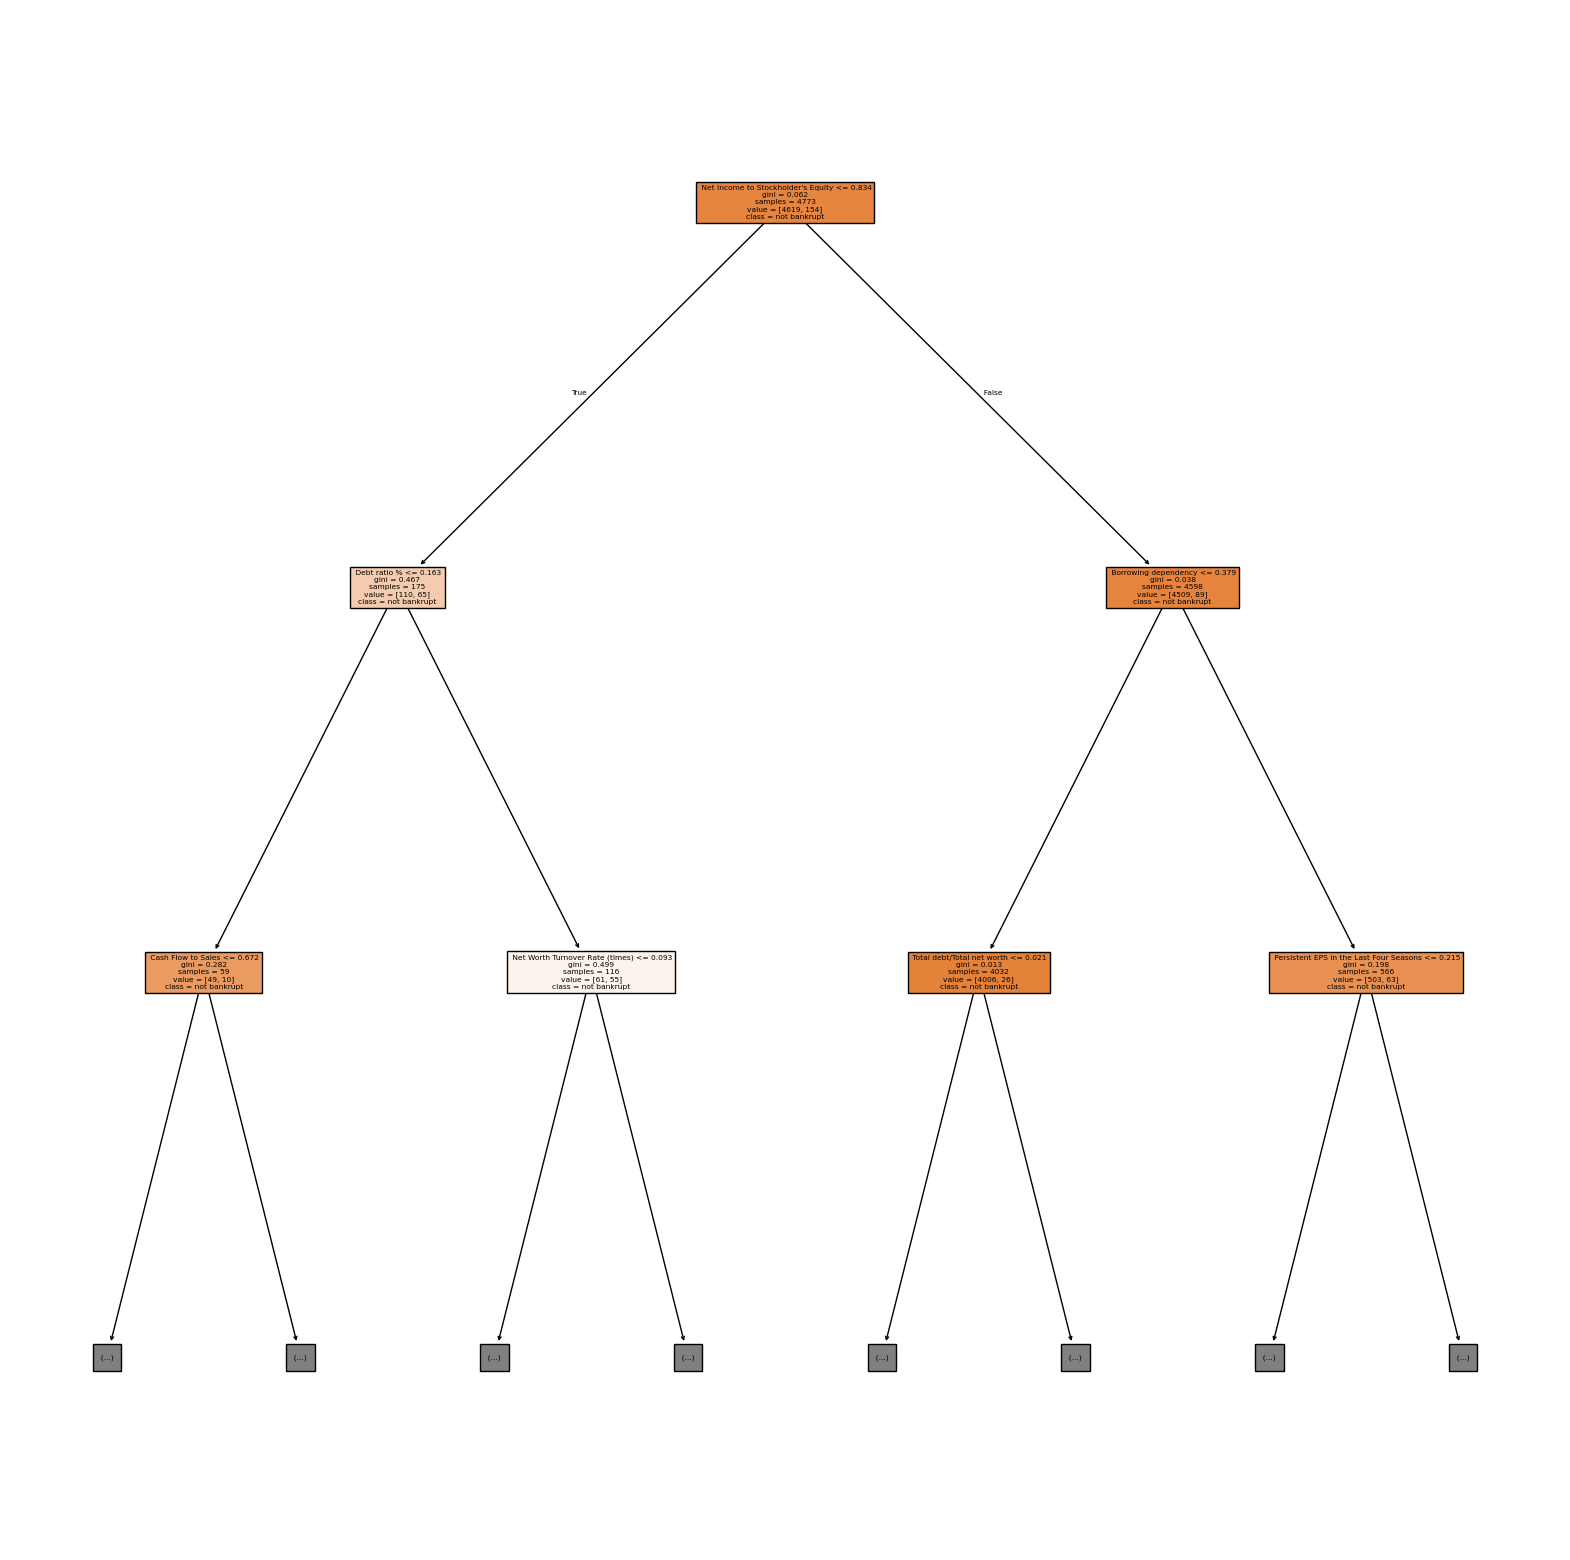

In [57]:
#Plot decision tree

plt.figure(figsize=(20,20))
plot_tree(Tree_model,max_depth=2,feature_names=X.columns,class_names={0:"not bankrupt", 1:"bankrupt"}, filled = True)

In [72]:
gb_params = {'max_depth': [2,5,8,10],
         'min_child_weight':[1,3,5],
         'learning_rate':[0.1,0.2,0.3],
         'n_estimators':[75,100,125]
        }
scoring = ['f1','accuracy']

In [73]:
xgb_model=XGBClassifier(objective='binary:logistic',random_state=0)

In [74]:
xgb_clf = GridSearchCV(xgb_model,gb_params,scoring=scoring,cv=5,refit='f1')

In [75]:
xgb_clf.fit(X_train,Y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=0, ...),
             param_grid={'learning_rate': [0.1, 0.2, 0.3],
                         'max_depth': [2, 5, 8, 10],
                         'min_child_weight': [1, 3, 5],
                         'n_estimators': [75, 100, 125]},
             refit='f1', scoring=['f1', 'accuracy'])

In [76]:
xgb_clf.best_score_

0.35329543496985355

In [77]:
xgb_clf.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=75, n_jobs=None,
              num_parallel_tree=None, random_state=0, ...)

In [81]:
XGBClassifier(max_depth=2, max_leaves=None,
              min_child_weight=3, monotone_constraints=None,
              multi_strategy=None, n_estimators=75, n_jobs=None,
              num_parallel_tree=None, random_state=0)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=75, n_jobs=None,
              num_parallel_tree=None, random_state=0, ...)

In [82]:
xgb_model.fit(X_train,Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=0, ...)

In [83]:
xgb_model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

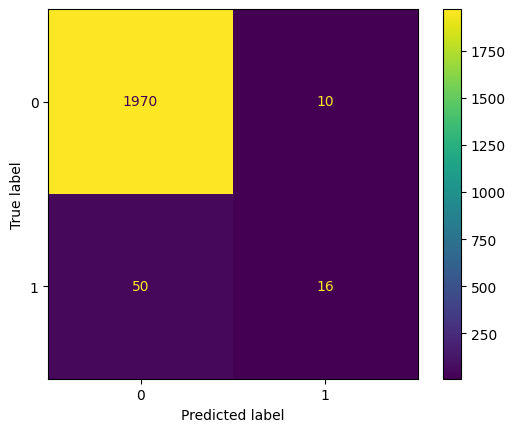

In [84]:
confusionMatrix(xgb_model,X_test,Y_test)